In [1]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

In [3]:
# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [4]:
#Next, we can iterate the lambda values ranged from 0 to 199. 
#Note that the coefficients at lambda equal to zero (x = 0) are the same with the OLS coefficients.
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

In [5]:
# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))


In [11]:
# organize dataframe
ridge_df = ridge_df.set_index("variable").T.rename_axis("estimate")

In [13]:
ridge_df.rename_axis(None).reset_index()

variable,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
1,estimate0,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
2,estimate1,-1.305844,1.491704,-0.186300,0.416554,-1.734866,2.368304,0.305241,-3.213459,2.540705,-1.976631,-1.746362,1.179751,-3.867286
3,estimate2,-1.291053,1.469716,-0.204508,0.421192,-1.700188,2.382762,0.292616,-3.171513,2.455276,-1.900395,-1.737941,1.178322,-3.847925
4,estimate3,-1.276962,1.448771,-0.221104,0.425531,-1.667018,2.396278,0.280573,-3.130750,2.375608,-1.830033,-1.729900,1.176856,-3.828944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,estimate195,-0.660784,0.677185,-0.504568,0.499952,-0.498848,2.188311,-0.201508,-0.898071,0.183866,-0.495208,-1.241954,0.828847,-2.302692
197,estimate196,-0.659786,0.676331,-0.504713,0.499619,-0.497990,2.185530,-0.202161,-0.894260,0.181707,-0.494909,-1.240543,0.827560,-2.298731
198,estimate197,-0.658794,0.675484,-0.504856,0.499284,-0.497142,2.182753,-0.202809,-0.890472,0.179565,-0.494614,-1.239137,0.826278,-2.294789
199,estimate198,-0.657808,0.674643,-0.504998,0.498948,-0.496303,2.179981,-0.203453,-0.886709,0.177438,-0.494324,-1.237735,0.825002,-2.290864


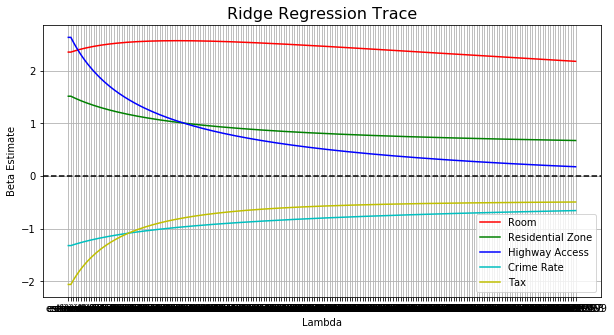

In [16]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)